<a href="https://colab.research.google.com/github/samuelhenrick1/Arduino/blob/main/AN%C3%81LISE_ESTAT%C3%8DSTICA_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1

Vamos fazer um exercício de Regressão Logística, trabalhando com a base de dados do Titanic.

Utilizaremos os arquivos disponibilizados no Moodle que foram preparados para esta atividade. Embora os nomes sejam os mesmos, estes arquivos do Moodle poder ser diferentes (em conteúdo) daqueles encontrados no site Kaggle.

A base de dados (treinamento) é uma coleção de dados sobre alguns dos passageiros (891 ou 892) e o objetivo é prever a sobrevivência (1 se o passageiro sobreviveu ou 0 caso contrário), baseado em algumas características tais como classe de serviço, sexo, idade, etc. A base de dados de teste tem a mesma estrutura da base de treinamento, mas a variável Survived não contém nenhum valor (ou não está presente)

Depois de construir seu modelo, você vai aplicá-lo ao este conjunto de dados de teste e prever o valor da variável Survived.

Como se pode ver, utilizaremos tanto variáveis categóricas como contínuas.

Quando trabalhamos com uma base de dados real, precisamos levar em conta o fato de podermos ter dados faltantes ou corrompidos, e, portanto, precisamos preparar a base de dados para nossa análise.

As tarefas a serem realizadas são:

In [1]:
train = read.csv('http://raw.githubusercontent.com/samuelhenrick1/Arduino/main/titanic_dw_train.csv')

In [2]:
test = read.csv('https://raw.githubusercontent.com/samuelhenrick1/Arduino/main/titanic_dw_test.csv')

In [3]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library("ggplot2")

In [7]:
str(test)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  1 7 8 9 14 16 20 23 29 37 ...
 $ Pclass     : int  2 3 1 1 1 1 3 3 1 3 ...
 $ Name       : chr  "Stanton, Mr. Samuel Ward" "Lang, Mr. Fang" "Eustis, Miss. Elizabeth Mussey" "Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)" ...
 $ Sex        : chr  "male" "male" "female" "female" ...
 $ Age        : num  41 26 54 48 62 36 21 NA 45 22 ...
 $ SibSp      : int  0 0 1 1 0 0 2 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 2 0 0 0 0 ...
 $ Ticket     : chr  "237734" "1601" "36947" "13567" ...
 $ Fare       : num  15 56.5 78.3 79.2 26.6 ...
 $ Cabin      : chr  NA NA "D20" "B41" ...
 $ Embarked   : chr  "C" "S" "C" "C" ...


In [8]:
head(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,2,"Stanton, Mr. Samuel Ward",male,41,0,0,237734,15.0458,NA,C
2,7,3,"Lang, Mr. Fang",male,26,0,0,1601,56.4958,NA,S
3,8,1,"Eustis, Miss. Elizabeth Mussey",female,54,1,0,36947,78.2667,D20,C
4,9,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)",female,48,1,1,13567,79.2000,B41,C
5,14,1,"Stead, Mr. William Thomas",male,62,0,0,113514,26.5500,C87,S
6,16,1,"Crosby, Miss. Harriet R",female,36,0,2,WE/P 5735,71.0000,B22,S


In [9]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  2 3 4 5 6 10 11 12 13 15 ...
 $ Survived   : int  0 1 0 1 0 0 1 0 0 1 ...
 $ Pclass     : int  3 1 2 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Johansson, Mr. Nils" "Minahan, Mrs. William Edward (Lillian E Thorpe)" "Hocking, Mr. Samuel James Metcalfe" "Chibnall, Mrs. (Edith Martha Bowerman)" ...
 $ Sex        : chr  "male" "female" "male" "female" ...
 $ Age        : num  29 37 36 NA 30 21 53 20 26 62 ...
 $ SibSp      : int  0 1 0 0 0 1 1 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 0 1 0 0 0 ...
 $ Ticket     : chr  "347467" "19928" "242963" "113505" ...
 $ Fare       : num  7.85 90 13 55 8.05 ...
 $ Cabin      : chr  NA "C78" NA "E33" ...
 $ Embarked   : chr  "S" "Q" "S" "S" ...


In [10]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,2,0,3,"Johansson, Mr. Nils",male,29,0,0,347467,7.8542,NA,S
2,3,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.0000,C78,Q
3,4,0,2,"Hocking, Mr. Samuel James Metcalfe",male,36,0,0,242963,13.0000,NA,S
4,5,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NA,0,1,113505,55.0000,E33,S
5,6,0,3,"Corn, Mr. Harry",male,30,0,0,SOTON/OQ 392090,8.0500,NA,S
6,10,0,3,"Wiklund, Mr. Karl Johan",male,21,1,0,3101266,6.4958,NA,S


a)       Fazer a preparação dos dados para serem utilizados na análise, considerando que serão utilizadas apenas as variáveis Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

A1) Do conjunto de dados original, você deve selecionar um subconjunto apenas com as variáveis indicadas acima e a variável PassengerId.

In [11]:
#Dica: função subset() ou select()
train[, c("Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","PassengerId")]

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>
0,3,male,29,0,0,7.8542,S,2
1,1,female,37,1,0,90.0000,Q,3
0,2,male,36,0,0,13.0000,S,4
1,1,female,NA,0,1,55.0000,S,5
0,3,male,30,0,0,8.0500,S,6
0,3,male,21,1,0,6.4958,S,10
1,1,male,53,1,1,81.8583,S,11
0,3,male,20,0,0,7.9250,S,12
0,3,male,26,0,0,7.8958,S,13


A2) Você deve  atribuir um valor para os NAs na variável Age. Utilize algum critério razoável, por exemplo, o valor médio.

In [12]:
# Dica: mean(train$Age, na.rm=TRUE)
# Dica: função mutate()

a = mean(train$Age, na.rm=TRUE)
a


[1] 29.99363

In [13]:
is.na(train$Age)

[1] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [25]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [49] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [61] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [73] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[121]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[145] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
[157] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[217]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[265] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[277] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[301] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[373] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[385] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[397] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[409] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[421] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[433] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[445] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[457] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[481] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[493] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[505] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
[517] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[553]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[577] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[613] FALSE FALSE  TRUE 

In [14]:
any(is.na(train$Age))

[1] TRUE

In [15]:
train$Age[is.na(train$Age)] = mean(train$Age, na.rm = TRUE)

In [16]:
train[, c("Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","PassengerId")]

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>
0,3,male,29.00000,0,0,7.8542,S,2
1,1,female,37.00000,1,0,90.0000,Q,3
0,2,male,36.00000,0,0,13.0000,S,4
1,1,female,29.99363,0,1,55.0000,S,5
0,3,male,30.00000,0,0,8.0500,S,6
0,3,male,21.00000,1,0,6.4958,S,10
1,1,male,53.00000,1,1,81.8583,S,11
0,3,male,20.00000,0,0,7.9250,S,12
0,3,male,26.00000,0,0,7.8958,S,13


In [17]:
any(is.na(train$Age))

[1] FALSE

A3)  Você deve remover as linhas onde ainda estiverem faltando dados, depois de atribuir o valor para os NAs de Age. Poucas linhas estarão ainda com dados faltantes.

In [18]:
sapply(train, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1         689           1

In [19]:
any(is.na(train$Cabin))

[1] TRUE

In [20]:
any(is.na(train$Embarked))

[1] TRUE

In [21]:
train = na.omit(train)

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
2,3,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00000,1,0,19928,90.0000,C78,Q
4,5,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,29.99363,0,1,113505,55.0000,E33,S
7,11,1,1,"Dodge, Dr. Washington",male,53.00000,1,1,33638,81.8583,A34,S
12,18,1,1,"Endres, Miss. Caroline Louise",female,38.00000,0,0,PC 17757,227.5250,C45,C
18,26,1,1,"Allen, Miss. Elisabeth Walton",female,29.00000,0,0,24160,211.3375,B5,S
19,27,0,1,"Brandeis, Mr. Emil",male,48.00000,0,0,PC 17591,50.4958,B10,C
26,35,1,1,"Stahelin-Maeglin, Dr. Max",male,32.00000,0,0,13214,30.5000,B50,C
28,38,0,2,"Nesson, Mr. Israel",male,26.00000,0,0,244368,13.0000,F2,S
32,44,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00000,0,0,113051,27.7500,C111,C


In [23]:
any(is.na(train$Embarked))

[1] FALSE

In [24]:
any(is.na(train$Cabin))

[1] FALSE

In [25]:
sapply(train, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

b)      Você deve criar um modelo  onde Survived será uma função das demais variáveis.

In [26]:
model = glm(train$Survived ~ train$Pclass + train$Sex + train$Age + train$SibSp + train$Parch + train$Fare + train$Embarked, family = binomial(link = "logit"), data = train)

In [27]:
model


Call:  glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Coefficients:
    (Intercept)     train$Pclass    train$Sexmale        train$Age  
      3.8427398       -0.0079399       -3.3943670       -0.0199676  
    train$SibSp      train$Parch       train$Fare  train$EmbarkedQ  
      0.3170292       -0.0733266        0.0005967       -2.1727456  
train$EmbarkedS  
     -0.3481518  

Degrees of Freedom: 200 Total (i.e. Null);  192 Residual
Null Deviance:	    262.3 
Residual Deviance: 177.5 	AIC: 195.5

In [28]:
summary(model)


Call:
glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7319  -0.8956   0.2657   0.4031   1.8390  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.8427398  1.0941206   3.512 0.000444 ***
train$Pclass    -0.0079399  0.4190878  -0.019 0.984884    
train$Sexmale   -3.3943670  0.5586071  -6.076 1.23e-09 ***
train$Age       -0.0199676  0.0131872  -1.514 0.129984    
train$SibSp      0.3170292  0.3545290   0.894 0.371201    
train$Parch     -0.0733266  0.2837629  -0.258 0.796092    
train$Fare       0.0005967  0.0026064   0.229 0.818931    
train$EmbarkedQ -2.1727456  1.7419128  -1.247 0.212275    
train$EmbarkedS -0.3481518  0.4060106  -0.857 0.391172    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion paramete

c)       Faça as análises do modelo, verificando a significância estatística das variáveis (e seus parâmetros ajustados), gráficos diagnósticos, etc.

In [29]:
deviance(model)/df.residual(model)

[1] 0.924392

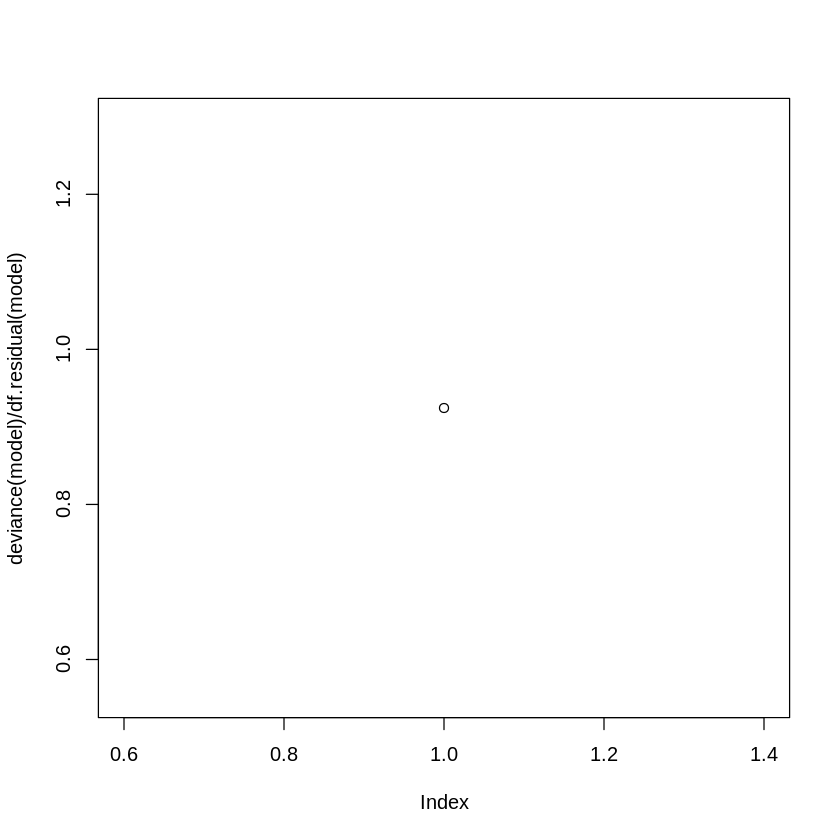

In [30]:
plot(deviance(model)/df.residual(model))

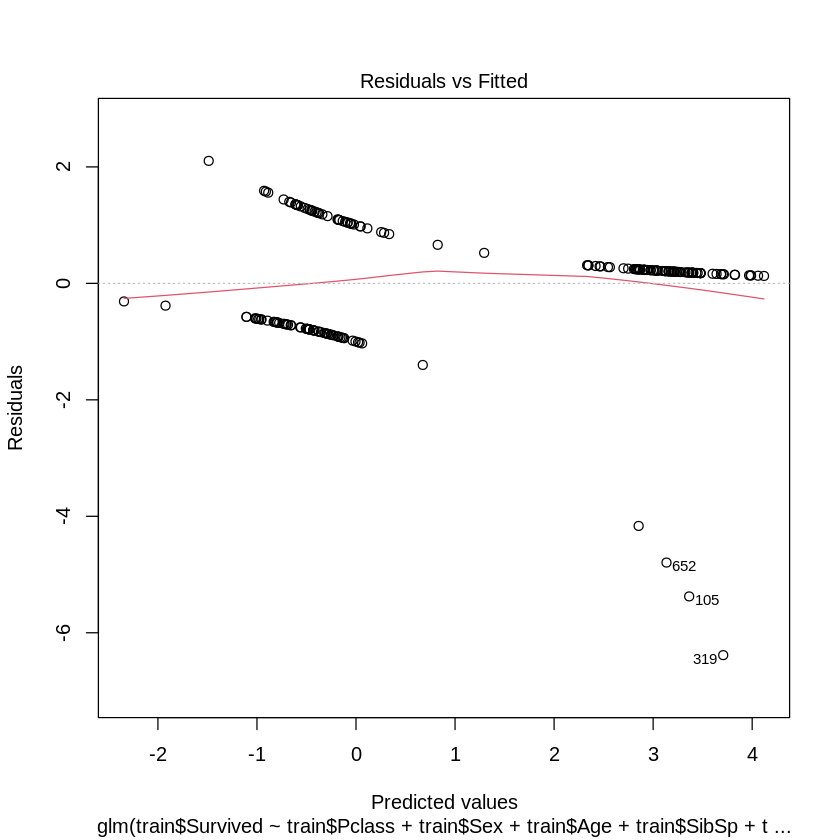

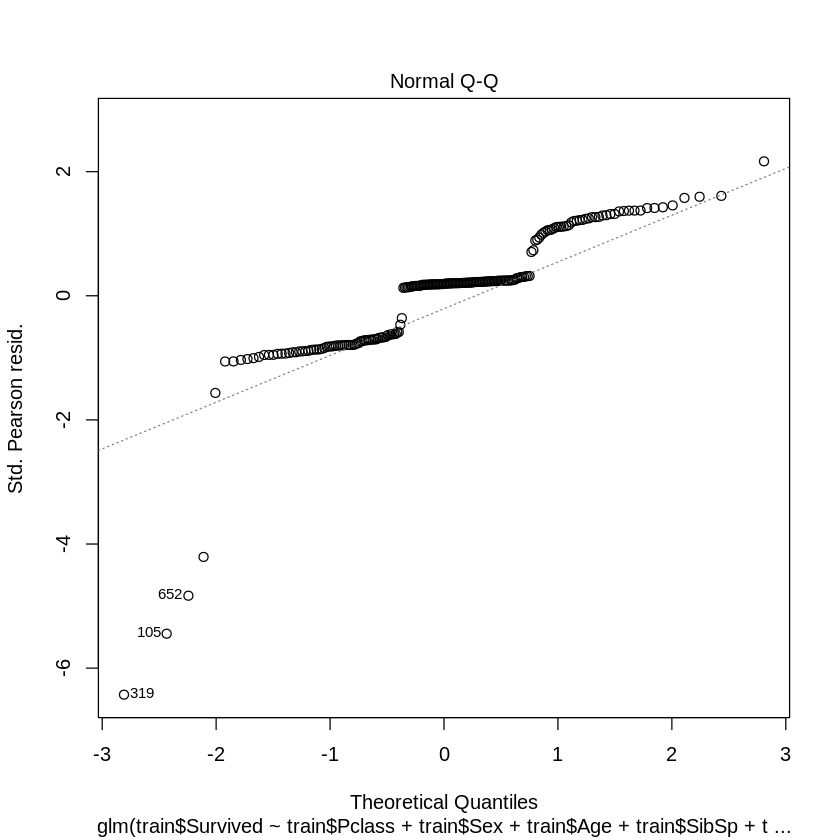

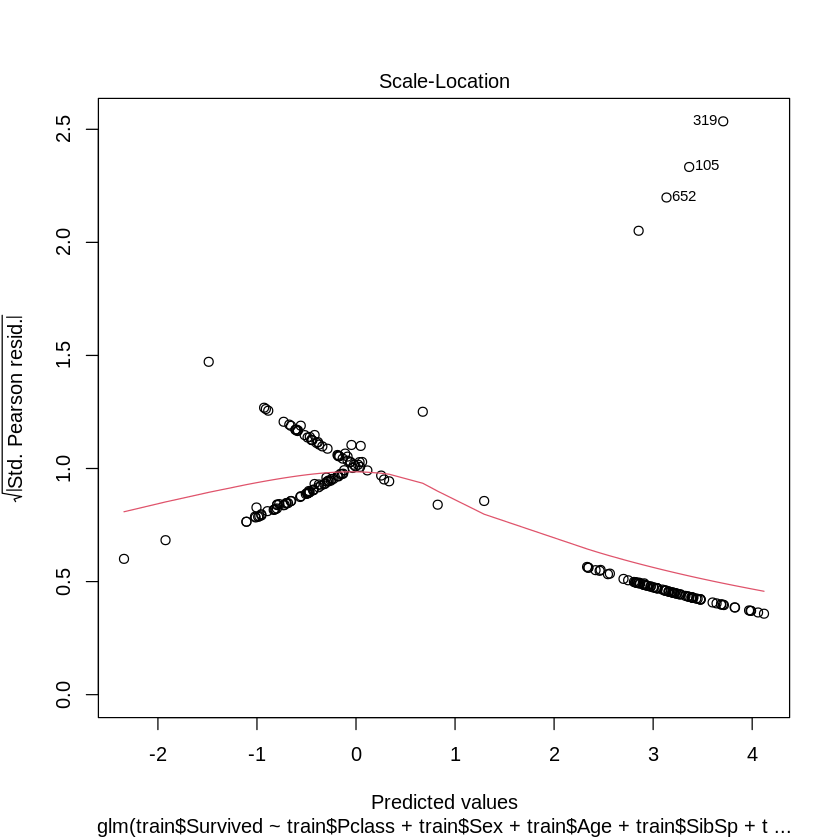

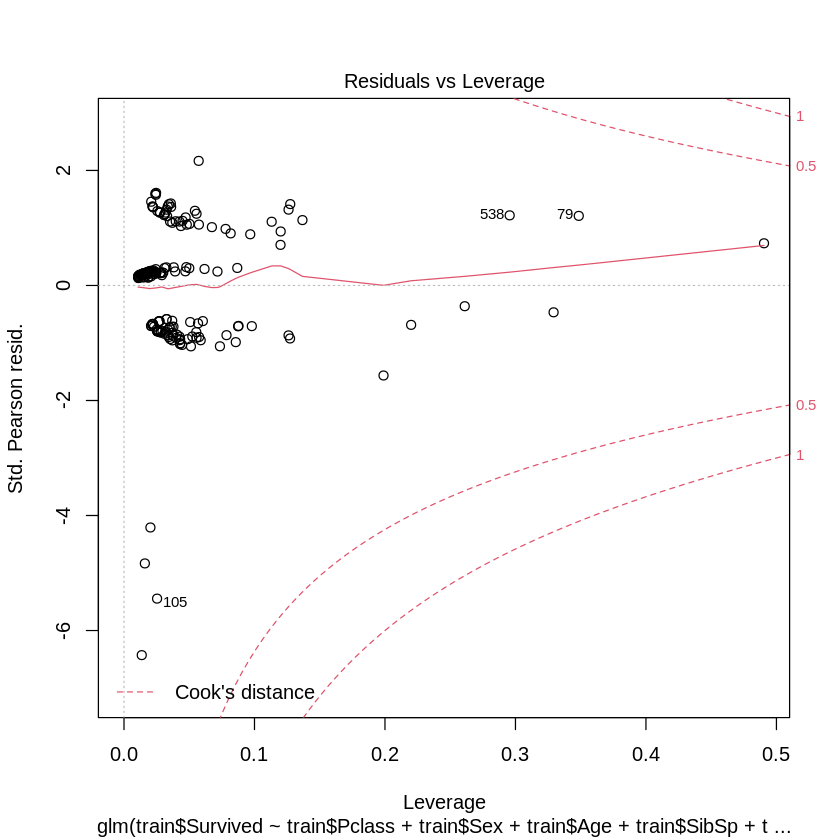

In [31]:
plot(model)

In [32]:
print(summary(model))#Quartis



Call:
glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7319  -0.8956   0.2657   0.4031   1.8390  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.8427398  1.0941206   3.512 0.000444 ***
train$Pclass    -0.0079399  0.4190878  -0.019 0.984884    
train$Sexmale   -3.3943670  0.5586071  -6.076 1.23e-09 ***
train$Age       -0.0199676  0.0131872  -1.514 0.129984    
train$SibSp      0.3170292  0.3545290   0.894 0.371201    
train$Parch     -0.0733266  0.2837629  -0.258 0.796092    
train$Fare       0.0005967  0.0026064   0.229 0.818931    
train$EmbarkedQ -2.1727456  1.7419128  -1.247 0.212275    
train$EmbarkedS -0.3481518  0.4060106  -0.857 0.391172    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion paramete

In [33]:
model


Call:  glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Coefficients:
    (Intercept)     train$Pclass    train$Sexmale        train$Age  
      3.8427398       -0.0079399       -3.3943670       -0.0199676  
    train$SibSp      train$Parch       train$Fare  train$EmbarkedQ  
      0.3170292       -0.0733266        0.0005967       -2.1727456  
train$EmbarkedS  
     -0.3481518  

Degrees of Freedom: 200 Total (i.e. Null);  192 Residual
Null Deviance:	    262.3 
Residual Deviance: 177.5 	AIC: 195.5

d)      Atualize o modelo como consequência da análise realizada no item anterior.

In [34]:
# *Remova as variaveis sem significância estatistica uma a uma.
# *Execute o modelo e avalie os resultados.
# *Avalie novamente a super dispersão.

#Ciente de que as variaveis sem significância estatistica sao aquelas com hipoteses nulas, então temos:

In [35]:
cor.test(train$Survived, train$Pclass)


	Pearson's product-moment correlation

data:  train$Survived and train$Pclass
t = 0.17475, df = 199, p-value = 0.8615
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1262242  0.1505236
sample estimates:
       cor 
0.01238693 


In [36]:
#cor.test(train$Survived, train$Sex) > Não é um vetor numérico, portato, será removida

In [37]:
cor.test(train$Survived, train$Age)


	Pearson's product-moment correlation

data:  train$Survived and train$Age
t = -2.5103, df = 199, p-value = 0.01286
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.30616916 -0.03771777
sample estimates:
      cor 
-0.175198 


In [38]:
cor.test(train$Survived, train$SibSp)


	Pearson's product-moment correlation

data:  train$Survived and train$SibSp
t = 2.0811, df = 199, p-value = 0.03871
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.007705219 0.278709670
sample estimates:
      cor 
0.1459443 


In [39]:
cor.test(train$Survived, train$Parch)


	Pearson's product-moment correlation

data:  train$Survived and train$Parch
t = 1.482, df = 199, p-value = 0.1399
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0344143  0.2394110
sample estimates:
     cor 
0.104478 


In [40]:
cor.test(train$Survived, train$Fare)


	Pearson's product-moment correlation

data:  train$Survived and train$Fare
t = 1.7872, df = 199, p-value = 0.07542
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01293105  0.25956823
sample estimates:
      cor 
0.1256886 


In [41]:
#cor.test(train$Survived, train$Embarked) > Não é um vetor numérico, portato, será removida

In [42]:
model2 = glm(train$Survived ~ train$Pclass + train$Age + train$SibSp + train$Parch + train$Fare, family = binomial(link = "logit"), data = train)

In [43]:
model2


Call:  glm(formula = train$Survived ~ train$Pclass + train$Age + train$SibSp + 
    train$Parch + train$Fare, family = binomial(link = "logit"), 
    data = train)

Coefficients:
 (Intercept)  train$Pclass     train$Age   train$SibSp   train$Parch  
    1.138149     -0.021225     -0.025416      0.446238      0.047497  
  train$Fare  
    0.002574  

Degrees of Freedom: 200 Total (i.e. Null);  195 Residual
Null Deviance:	    262.3 
Residual Deviance: 249.4 	AIC: 261.4

In [44]:
summary(model2)


Call:
glm(formula = train$Survived ~ train$Pclass + train$Age + train$SibSp + 
    train$Parch + train$Fare, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3694  -1.2381   0.7691   0.9609   1.5481  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1.138149   0.731086   1.557   0.1195  
train$Pclass -0.021225   0.336392  -0.063   0.9497  
train$Age    -0.025416   0.010849  -2.343   0.0191 *
train$SibSp   0.446238   0.281330   1.586   0.1127  
train$Parch   0.047497   0.223681   0.212   0.8318  
train$Fare    0.002574   0.002335   1.103   0.2702  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 262.26  on 200  degrees of freedom
Residual deviance: 249.40  on 195  degrees of freedom
AIC: 261.4

Number of Fisher Scoring iterations: 4


In [45]:
deviance(model2)/df.residual(model2)

[1] 1.278987

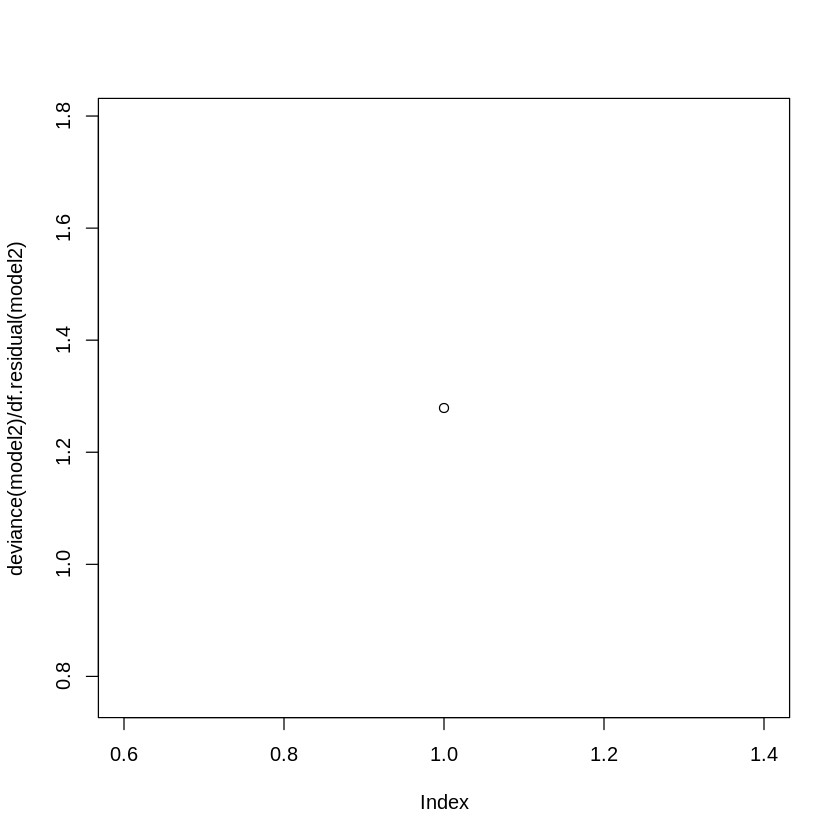

In [46]:
plot(deviance(model2)/df.residual(model2))

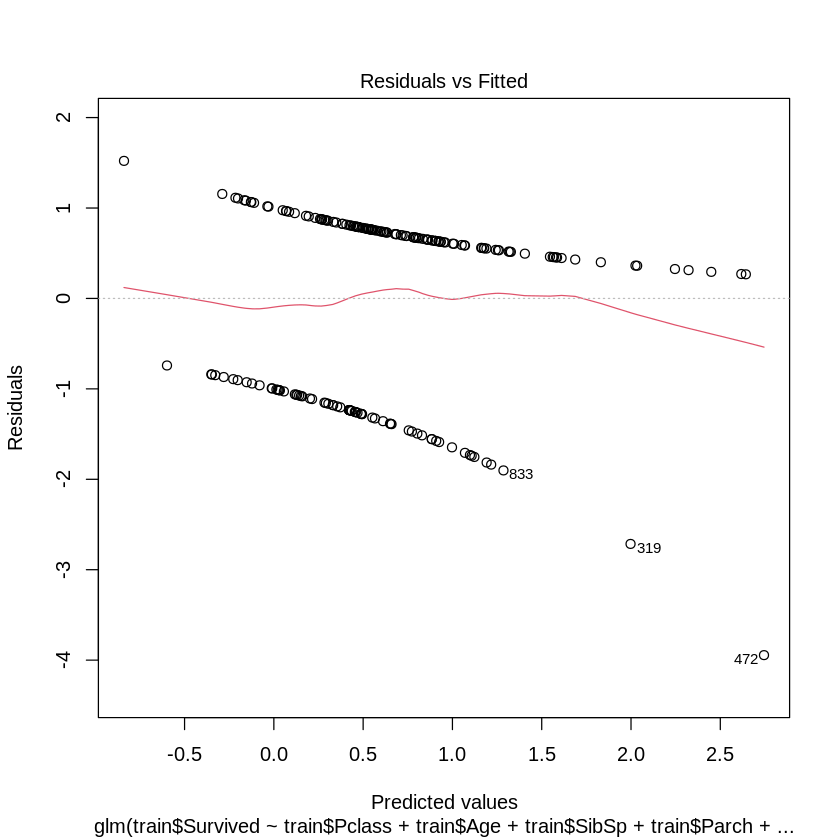

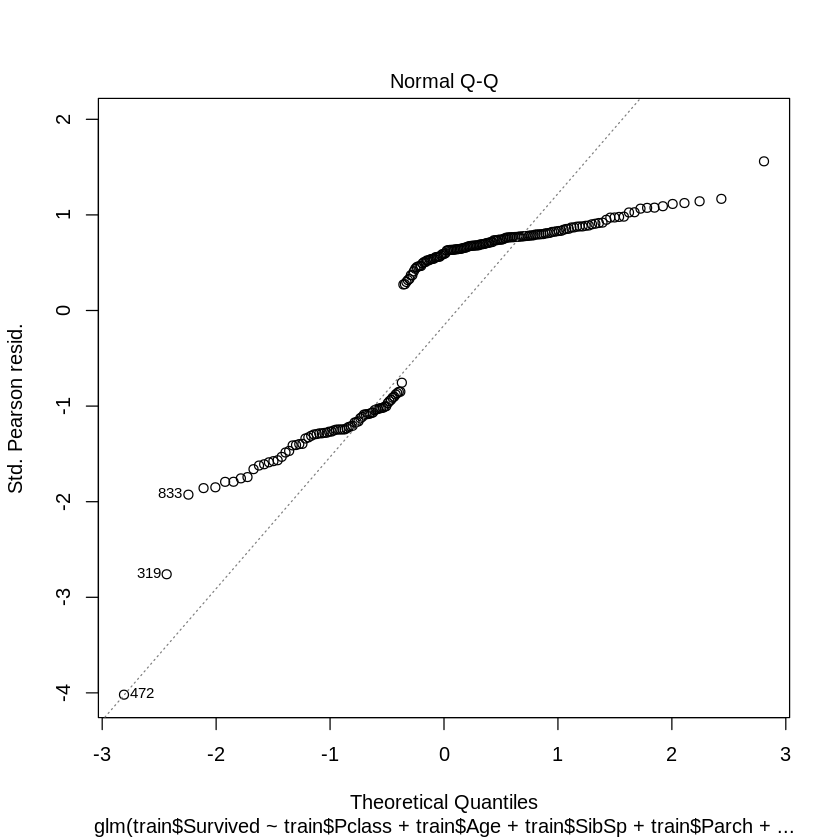

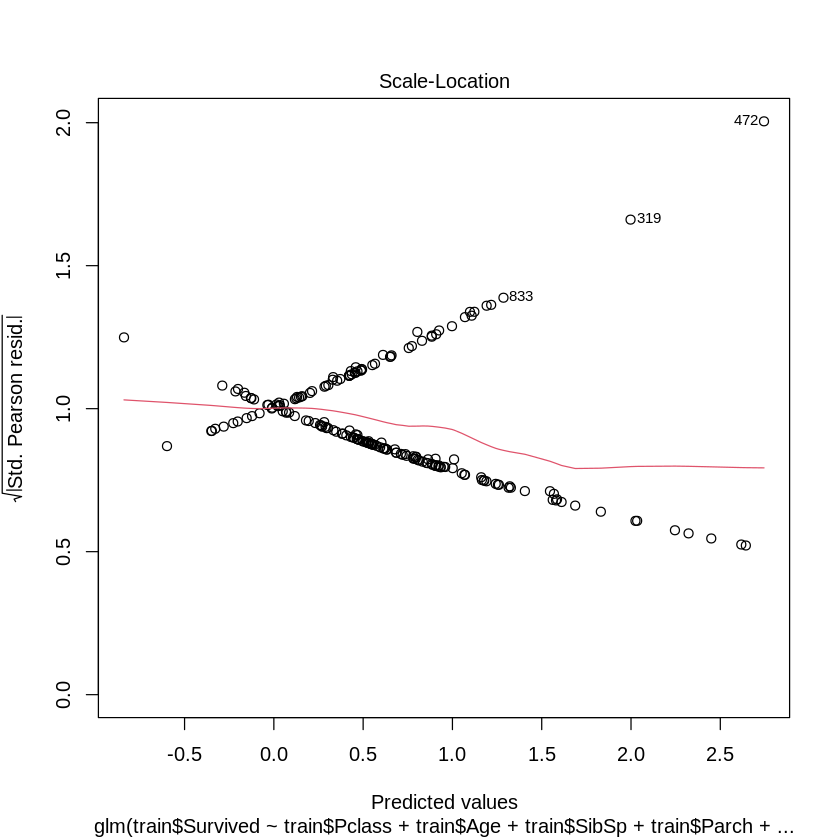

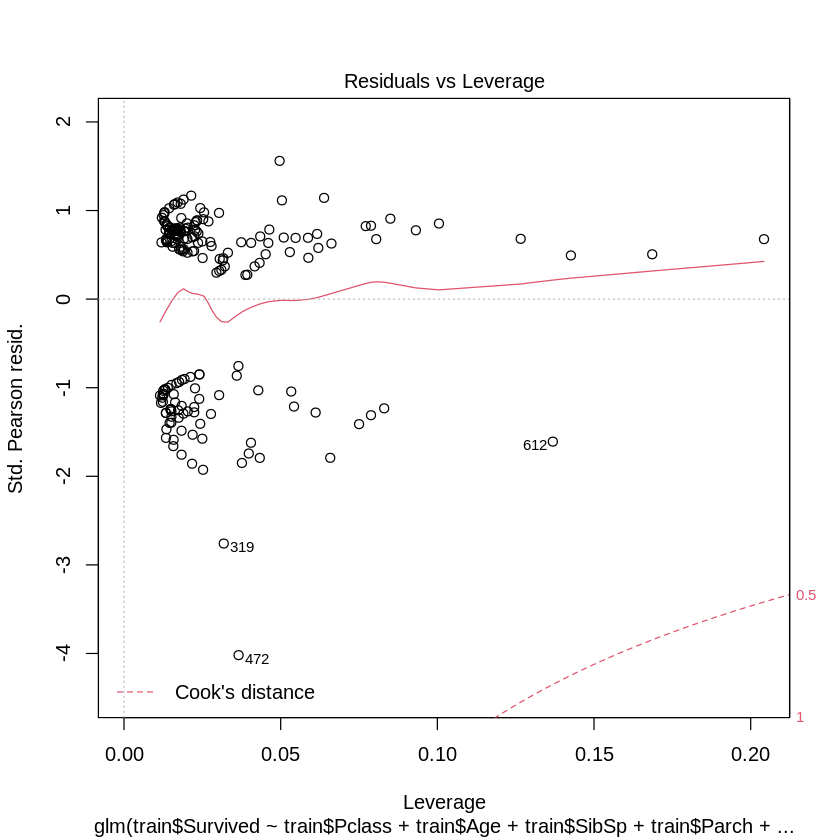

In [47]:
plot(model2)

In [48]:
print(summary(model))#Quartis



Call:
glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7319  -0.8956   0.2657   0.4031   1.8390  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.8427398  1.0941206   3.512 0.000444 ***
train$Pclass    -0.0079399  0.4190878  -0.019 0.984884    
train$Sexmale   -3.3943670  0.5586071  -6.076 1.23e-09 ***
train$Age       -0.0199676  0.0131872  -1.514 0.129984    
train$SibSp      0.3170292  0.3545290   0.894 0.371201    
train$Parch     -0.0733266  0.2837629  -0.258 0.796092    
train$Fare       0.0005967  0.0026064   0.229 0.818931    
train$EmbarkedQ -2.1727456  1.7419128  -1.247 0.212275    
train$EmbarkedS -0.3481518  0.4060106  -0.857 0.391172    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion paramete

e)      Faça as previsões da variável Survived na base de dados de teste utilizando o modelo refinado, e prepare um arquivo CSV para submissão que contenha apenas duas colunas: PassengerId, Survived.

In [49]:
results.Survived = predict(model,
                           newdata = subset(test,
                                            select = c(2,4, 5, 6, 7, 9, 11)),
                           type = "response")
# *Trate a base de dados de teste.


Warning message:
“'newdata' had 418 rows but variables found have 201 rows”


In [50]:
results.Survived = ifelse(results.Survived > 0.5, 1, 0)

In [51]:
table(results.Survived) # *Avalie os dados faltantes e trate-os.

results.Survived
  0   1 
101 100 

In [52]:
# Aplique o modelo preditivo.
results.Survived

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   0   1   1   0   0   0   0   0   1   0   1   0   1   1   0   1   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   0   1   1   0   1   1   0   1   1   0   1   0   1   1   1   0   1   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   1   0   1   1   0   1   0   1   1   1   1   0   1   1   0   1   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   1   1   0   1   0   1   0   0   1   1   1   1   0   0   0   0   0   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   0   1   1   1   0   1   1   0   0   1   1   1   0   1   0   0   0   1   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   0   1   0   0   1   1   1   0   1   1   1   0   0   0   1   1   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   0   1   0   0   1   0   0   1   0   0   1   1   1   0   1   0   1   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   0   0   0   0   1   0   0   0   1   0   1   0   1   1   0   0   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   1   0   1   0   0   1   0   1   1   0   1   1   0   0   1   0   1   0   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   1   0   0   0   0   0   0   0   1   1   0   0   1   0   1   0   1   0   0 
201 
  1

In [53]:
model


Call:  glm(formula = train$Survived ~ train$Pclass + train$Sex + train$Age + 
    train$SibSp + train$Parch + train$Fare + train$Embarked, 
    family = binomial(link = "logit"), data = train)

Coefficients:
    (Intercept)     train$Pclass    train$Sexmale        train$Age  
      3.8427398       -0.0079399       -3.3943670       -0.0199676  
    train$SibSp      train$Parch       train$Fare  train$EmbarkedQ  
      0.3170292       -0.0733266        0.0005967       -2.1727456  
train$EmbarkedS  
     -0.3481518  

Degrees of Freedom: 200 Total (i.e. Null);  192 Residual
Null Deviance:	    262.3 
Residual Deviance: 177.5 	AIC: 195.5

In [60]:
head(model)

,(Intercept),train$Pclass,train$Sexmale,train$Age,train$SibSp,train$Parch,train$Fare,train$EmbarkedQ,train$EmbarkedS
(Intercept),-5.430706,-6.390067,-4.73670254,-206.3282652,-2.1882488,-2.2942417,-409.07170,-0.066320191,-3.34070399
train$Pclass,0.000000,2.689321,-0.02148851,-28.5609580,-0.6214877,-0.1151775,-121.18675,0.035833950,0.38795712
train$Sexmale,0.000000,0.000000,-1.81296105,-0.5282783,0.2435939,0.3757215,35.62036,0.067348510,-0.06379592
train$Age,0.000000,0.000000,0.00000000,-78.3074072,0.1073834,0.7589054,45.79090,-0.011746489,0.39607152
train$SibSp,0.000000,0.000000,0.00000000,0.0000000,3.0258335,1.1685598,104.33471,0.083759150,0.05699327
train$Parch,0.000000,0.000000,0.00000000,0.0000000,0.0000000,3.8572936,167.88741,-0.067999664,-0.07679914
train$Fare,0.000000,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,397.08926,0.009731394,-0.66227165
train$EmbarkedQ,0.000000,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000,0.581442163,-0.39567194
train$EmbarkedS,0.000000,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000000,2.46298995


In [61]:
sum(is.na(model))

[1] 0

In [65]:
sum(is.na(test[ ,c('PassengerId','Pclass','Sex','Age','SibSp') ]))

[1] 91

In [66]:
test_new = na.omit( test[ ,c('PassengerId','Pclass','Sex','Age','SibSp') ] )

In [67]:
sum(is.na(test_new))

[1] 0

In [68]:
head(test_new)

,PassengerId,Pclass,Sex,Age,SibSp
,<int>,<int>,<chr>,<dbl>,<int>
1,1,2,male,41,0
2,7,3,male,26,0
3,8,1,female,54,1
4,9,1,female,48,1
5,14,1,male,62,0
6,16,1,female,36,0


In [69]:
nrow(test_new)

[1] 327

In [70]:
test_new$Pclass = as.factor(test_new$Pclass)

In [72]:
prob = predict(model, newdata = test_new)

Warning message:
“'newdata' had 327 rows but variables found have 201 rows”


In [73]:
prob[0:10]

1          2          3          4          5          6          7 
 1.2939826  2.8472380 -0.6734558  3.2117858  3.0336838 -0.4878814 -0.1803310 
         8          9         10 
-0.4270587 -0.1420367 -0.4726970

In [74]:
str(prob)

 Named num [1:201] 1.294 2.847 -0.673 3.212 3.034 ...
 - attr(*, "names")= chr [1:201] "1" "2" "3" "4" ...


In [75]:
length(prob)

[1] 201

In [76]:
results = data.frame(PassengerId = test_new[, 'PassengerId'])
head(results)

,PassengerId
,<int>
1,1
2,7
3,8
4,9
5,14
6,16


In [88]:
head(results)

,PassengerId
,<int>
1,1
2,7
3,8
4,9
5,14
6,16


f)        Submeta seu arquivo e também o script R com todas as análises realizadas, até a criação do arquivo CSV.

In [99]:
submissao = data.frame(PassengerId = model2[, "PassengerId"],Survived = results.Survived)

write.csv(submissao, "titanic-submissao.csv",

row.names = FALSE, quote = FALSE)

ERROR: ignored

Survived: 0 = Não, 1 = Sim
Pclass: Classe de ingresso (1Âº, 2Âº, 3Âº)
Sex: Sexo do passageiro
Age: Idade em anos
SibSp: Quantidade de irmãos / conjuges a bordo do Titanic
Parch: Quantidade de pais / crianÃ§as a bordo do Titanic
Fare: Tarifa paga pelo Passageiro
Embarked: Porto de Embarque (Cherbourg, Queenstown, Southampton)

# BÃ´nus: calcular a acurÃ¡cia
# Pacote: caret - funÃ§Ã£o confusionMatrix()

# Total      : 1309
# Treinamento: 891 (68%) ---> 606 (tem resposta)
# ValidaÃ§Ã£o  :           ---> 285 (tem resposta)
# Teste      : 418 (32%) ---> nÃ£o tem a resposta

# 1. Separar a base de treinamento em treinamento/validaÃ§Ã£o;
# 2. Criar o modelo de regressÃ£o usando treinamento (glm);
# 3. Predizer a resposta em validaÃ§Ã£o sem usar Survived (predict);
# 4. Comparar a resposta predita com a resposta original.